Graphe de la structure de bande:


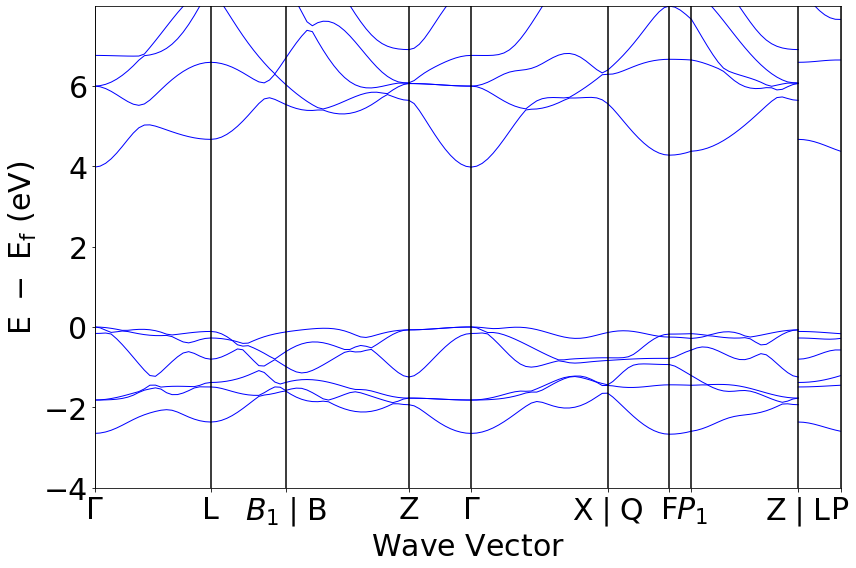

La bande interdite de NaSmO2 est caractérisée par : {'direct': True, 'energy': 3.9782, 'transition': '\\Gamma-\\Gamma'}
On voit donc qu'il s'agit d'une bande directe d'énergie 3.9782 eV
tableau de distance : [0.0, 1.0435062164614597, 1.0435062164614597, 1.7145188422272661, 2.821808291045826, 2.821808291045826, 3.381337885910379, 3.381337885910379, 4.605995236085467, 5.159639916626935, 5.159639916626935, 5.358078001899633, 5.358078001899633, 6.317018819246069, 6.696143418995917]
Branches : ['$\\Gamma$', 'L', 'L', '$B_1$$\\mid$B', 'Z', 'Z', '$\\Gamma$', '$\\Gamma$', 'X$\\mid$Q', 'F', 'F', '$P_1$', '$P_1$', 'Z$\\mid$L', 'P']


La dernière bande de valence pour la première branche est : [0.0, -0.0039000000000000146, -0.015300000000000091, -0.03330000000000011, -0.056800000000000184, -0.08400000000000007, -0.08310000000000006, -0.06830000000000014, -0.05930000000000013, -0.058900000000000174, -0.06930000000000014, -0.09230000000000005, -0.12880000000000014, -0.1785000000000001, -0.198200000

In [38]:
#Tâche 8 : [NaSmO2] Télécharger la structure de bande du matériau et l'analyser : 
# 1. Déterminer la bande interdite;
# 2. Trouver la direction dans laquelle la dernière (première) bande de
#    valence (conduction) présente le plus et le moins de dispersion
#    (insérer une figure indiquant la dispersion par des flèches);
# 3. calculer la masse effective au sommet (base) de la dernière (première)
#    bande de valence (conduction) en supposant une dispersion
#    parabolique.

from pymatgen.io.cif import CifParser 
parser = CifParser("NaSmO2_mp-756034_symmetrized.cif") #importe le fichier CIF
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter
with MPRester("blOWflU3npEF7GSb") as m:

# Crée un objet structure avec la structure du matériau NaSmO2
    structure = m.get_structure_by_material_id("mp-756034")
#Soucis sur Material Project : cette ligne permet de faire en sorte que 
#la strtucture respecte a=b=c et alpha=beta=gamme
    new_s=SpacegroupAnalyzer(structure).get_primitive_standard_structure()
#Télécharge la structure de bande du matériau NaSmO2
    structure_de_bande = m.get_bandstructure_by_material_id("mp-756034")
#Implémente un plotter qui va permettre d'obtenir le graphe des structures de bande 
    Graph=plotter.BSPlotter(structure_de_bande)
    print("Graphe de la structure de bande:")
    Graph.show()
    

#Crée un objet dictionnary contenant l'énergie de la bande interdite, un boulean exprimant ci celle-ci est 
#directe ou non et les labels kpoint de la transition 
    Bande_interdite = bandstructure.get_band_gap()
    print("La bande interdite de NaSmO2 est caractérisée par :",Bande_interdite)
    print("On voit donc qu'il s'agit d'une bande directe d'énergie 3.9782 eV")
    
#Crée un dictionnaire contenant des données utiles sur les structure de bande telles que les ticks, l'énergie
#de chaque kpoint, vbm, cbm,...
    data = Graph.bs_plot_data()
#On sort les ticks de ce dictionnaire. Ce ticks est lui-aussi un dictionnaire contenant les distances 
#auxquelles il y a un point k (sur l'axe des x) et les branches. On extrait ces données
    ticks = data.get('ticks')
    branche = ticks.get('label')
    distance = ticks.get('distance')
#On extrait également l'énergie de chaque branche 
    branche1= data.get('energy')[0]
    branche2= data.get('energy')[1]
    branche3= data.get('energy')[2]
    branche4= data.get('energy')[3]
    branche5= data.get('energy')[4]
    branche6= data.get('energy')[5]
    branche7= data.get('energy')[6]
    branche8= data.get('energy')[7]
    branche9= data.get('energy')[8]
#On calcule les distances entre les branches en s'aidant du tabelau "branche" pour savoir quelles distance 
#soustraire pour avoir les distances entre les branches (on calcule donc delta_x)
    print('tableau de distance :',distance)
    print('Branches :', branche)
    print('\n')
    delta_x1 = (distance)[1] - (distance)[0] #gamma et L
    delta_x2 = (distance)[3] - (distance)[1] #L et B1|B
    delta_x3 = (distance)[4] - (distance)[3] #B1|B et Z
    delta_x4 = (distance)[6] - (distance)[4] #Z et gamma
    delta_x5 = (distance)[8] - (distance)[6] #gamma et X|Q
    delta_x6 = (distance)[9] - (distance)[8] #X|Q et F
    delta_x7 = (distance)[11] - (distance)[9] #F et P1
    delta_x8 = (distance)[13] - (distance)[11] #P1 et Z|L
    delta_x9 = (distance)[14] - (distance)[13] #Z|L et P
#On calcul les différence d'énergie entre les lignes séparant les branches (on aura donc delta_y).
#On ne veut calculer la dispersion que pour la dernière bande de valence et la permière bande de conduction. On
#doit donc trouver quelles sont ses bandes dans le tableau 'energy' donné dans le dictionnaire data. Pour ce
#faire, on regarde les lignes les unes à la suite des autres et lorsqu'on verra un gap d'énergie entre deux 
#lignes successives, on aura trouvé la dernière bande de valence et la première bande de conduction.
    print('La dernière bande de valence pour la première branche est :',branche1.get('1')[14], 'son indice est 14') 
    print('La première bande de valence pour la première branche est :',branche1.get('1')[15],'son indice est 15')
    print('\n')
    vdelta_y1 = (branche1.get('1')[14])[len(branche1.get('1')[14])-1] - (branche1.get('1')[14])[0] 
    cdelta_y1 = (branche1.get('1')[15])[len(branche1.get('1')[15])-1] - (branche1.get('1')[15])[0]
    vdelta_y2 = (branche2.get('1')[14])[len(branche2.get('1')[14])-1] - (branche2.get('1')[14])[0]
    cdelta_y2 = (branche2.get('1')[15])[len(branche2.get('1')[15])-1] - (branche2.get('1')[15])[0]
    vdelta_y3 = (branche3.get('1')[14])[len(branche3.get('1')[14])-1] - (branche3.get('1')[14])[0]
    cdelta_y3 = (branche3.get('1')[15])[len(branche3.get('1')[15])-1] - (branche3.get('1')[15])[0]
    vdelta_y4 = (branche4.get('1')[14])[len(branche4.get('1')[14])-1] - (branche4.get('1')[14])[0]
    cdelta_y4 = (branche4.get('1')[15])[len(branche4.get('1')[15])-1] - (branche4.get('1')[15])[0]
    vdelta_y5 = (branche5.get('1')[14])[len(branche5.get('1')[14])-1] - (branche5.get('1')[14])[0]
    cdelta_y5 = (branche5.get('1')[15])[len(branche5.get('1')[15])-1] - (branche5.get('1')[15])[0]
    vdelta_y6 = (branche6.get('1')[14])[len(branche6.get('1')[14])-1] - (branche6.get('1')[14])[0]
    cdelta_y6 = (branche6.get('1')[15])[len(branche6.get('1')[15])-1] - (branche6.get('1')[15])[0]
    vdelta_y7 = (branche7.get('1')[14])[len(branche7.get('1')[14])-1] - (branche7.get('1')[14])[0]
    vdelta_y8 = (branche8.get('1')[14])[len(branche8.get('1')[14])-1] - (branche8.get('1')[14])[0]
    vdelta_y9 = (branche9.get('1')[14])[len(branche9.get('1')[14])-1] - (branche9.get('1')[14])[0]
    cdelta_y7 = (branche7.get('1')[15])[len(branche7.get('1')[15])-1] - (branche7.get('1')[15])[0]
    cdelta_y8 = (branche8.get('1')[15])[len(branche8.get('1')[15])-1] - (branche8.get('1')[15])[0]
    cdelta_y9 = (branche9.get('1')[15])[len(branche9.get('1')[15])-1] - (branche9.get('1')[15])[0]
    
#Pour avoir la pente pour chaque branche de la dernière bande de valent et de la première bande de conduction
#il suffit de faire (c/v)delta_yi/delta_xi. Les dispersions max et min seront les pentes max et min. 
    print('Pour trouver la direction dans laquelle la dernière (première) bande de valence (conduction)')
    print('présente le plus et le moins de dispersion, il faut trouver l endroit où la pente est le plus grande')
    print('et là plus petite. En effet, notre graphe de structure de bande nous donne une variation d énergie')
    print('en fonction de la distance, ce qui est la définition de la dispertion et la pente nous donne la')
    print('variation de cette dispersion.')
    print('\n')
    
    print('Branche 1')
    print('pente de la dernière bande de valence :', vdelta_y1/delta_x1)
    print('pente de la première bande de conduction :', cdelta_y1/delta_x1)
    print('\n')
    print('Branche 2')
    print('pente de la dernière bande de valence :', vdelta_y2/delta_x2)
    print('pente de la première bande de conduction :', cdelta_y2/delta_x2)
    print('\n')
    print('Branche 3')
    print('pente de la dernière bande de valence :', vdelta_y3/delta_x3)
    print('pente de la première bande de conduction :', cdelta_y3/delta_x3)
    print('\n')
    print('Branche 4')
    print('pente de la dernière bande de valence :', vdelta_y4/delta_x4)
    print('pente de la première bande de conduction :', cdelta_y4/delta_x4)
    print('\n')
    print('Branche 5')
    print('pente de la dernière bande de valence :', vdelta_y5/delta_x5)
    print('pente de la première bande de conduction :', cdelta_y5/delta_x5)
    print('\n')
    print('Branche 6')
    print('pente de la dernière bande de valence :', vdelta_y6/delta_x6)
    print('pente de la première bande de conduction :', cdelta_y6/delta_x6)
    print('\n')
    print('Branche 7')
    print('pente de la dernière bande de valence :', vdelta_y7/delta_x7)
    print('pente de la première bande de conduction :', cdelta_y7/delta_x7)
    print('\n')
    print('Branche 8')
    print('pente de la dernière bande de valence :', vdelta_y8/delta_x8)
    print('pente de la première bande de conduction :', cdelta_y8/delta_x8)
    print('\n')
    print('Branche 9')
    print('pente de la dernière bande de valence :', vdelta_y9/delta_x9)
    print('pente de la première bande de conduction :', cdelta_y9/delta_x9)
    print('\n')
    max_v = max(abs(vdelta_y1/delta_x1), abs(vdelta_y2/delta_x2),abs(vdelta_y3/delta_x3), abs(vdelta_y4/delta_x4), abs(vdelta_y5/delta_x5),abs(vdelta_y6/delta_x6),abs(vdelta_y7/delta_x7),abs(vdelta_y8/delta_x8),abs(vdelta_y9/delta_x9))
    min_v = min(abs(vdelta_y1/delta_x1), abs(vdelta_y2/delta_x2),abs(vdelta_y3/delta_x3), abs(vdelta_y4/delta_x4), abs(vdelta_y5/delta_x5),abs(vdelta_y6/delta_x6),abs(vdelta_y7/delta_x7),abs(vdelta_y8/delta_x8),abs(vdelta_y9/delta_x9))
    max_c = max(abs(cdelta_y1/delta_x1), abs(cdelta_y2/delta_x2),abs(cdelta_y3/delta_x3), abs(cdelta_y4/delta_x4), abs(cdelta_y5/delta_x5),abs(cdelta_y6/delta_x6),abs(cdelta_y7/delta_x7),abs(cdelta_y8/delta_x8),abs(cdelta_y9/delta_x9))
    min_c = min(abs(cdelta_y1/delta_x1), abs(cdelta_y2/delta_x2),abs(cdelta_y3/delta_x3), abs(cdelta_y4/delta_x4), abs(cdelta_y5/delta_x5),abs(cdelta_y6/delta_x6),abs(cdelta_y7/delta_x7),abs(cdelta_y8/delta_x8),abs(cdelta_y9/delta_x9))
    print('Le max de dispersion de la dernière bande de valence est :', max_v, '()')
    print('Le min de dispersion de la dernière bande de valence est :', min_v)
    print('Le max de dispersion de la première bande de conduction est :', max_c)
    print('Le min de dispersion de la première bande de conduction est :', min_c)
    print('\n')
    print('REM : pour voir comment cela a été calculé : voir commentaires du code')